# SWA145 flights: LAX to LIH (LA TO KAUAI)

### Import Python tools and Jupyter configuration

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_latimes as lat
import datetime as dt
import requests
from datetime import datetime
import glob
from shapely.geometry import Point, LineString, MultiLineString

/Users/mhustiles/.local/share/virtualenvs/notebooks-xu8v5Vvv/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = None
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [4]:
today = datetime.today().strftime("%Y-%m-%d_%H-%M-%S")

In [5]:
today

'2021-08-10_13-57-58'

---

### Get your current location

In [6]:
df = pd.read_json("https://getconnected.southwestwifi.com/current.json")

In [7]:
df.iloc[0]

sat_commlink_portal     conn_ok
pcent_flt_complete           98
altVal                    10564
lon                    -158.643
satcomm_status              NaN
dtzone                      HST
within_us                  True
etad                   11:10 AM
lat                      21.889
gspdVal                     378
ttgc                     0h 13m
dist_remain                  45
actime24                  10:57
Name: status, dtype: object

### Get geodataframe

In [8]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

<AxesSubplot:>

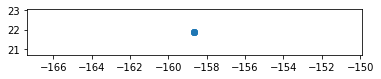

In [9]:
gdf.plot()

In [10]:
gdf.to_file("data/processed/sw_location" + today + ".geojson", driver="GeoJSON")